<a href="https://colab.research.google.com/github/brianblockmon/Interstate280Project/blob/main/CUDF_PeMS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General Exploratory Data Analysis

### Import necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read in joined dataframe (created in join_sensor_station_weather.ipynb file)

In [ ]:
df_north = pd.read_csv('/content/drive/MyDrive/PeMS Data/df_north.csv')

### Average MPH for each Station by Hour

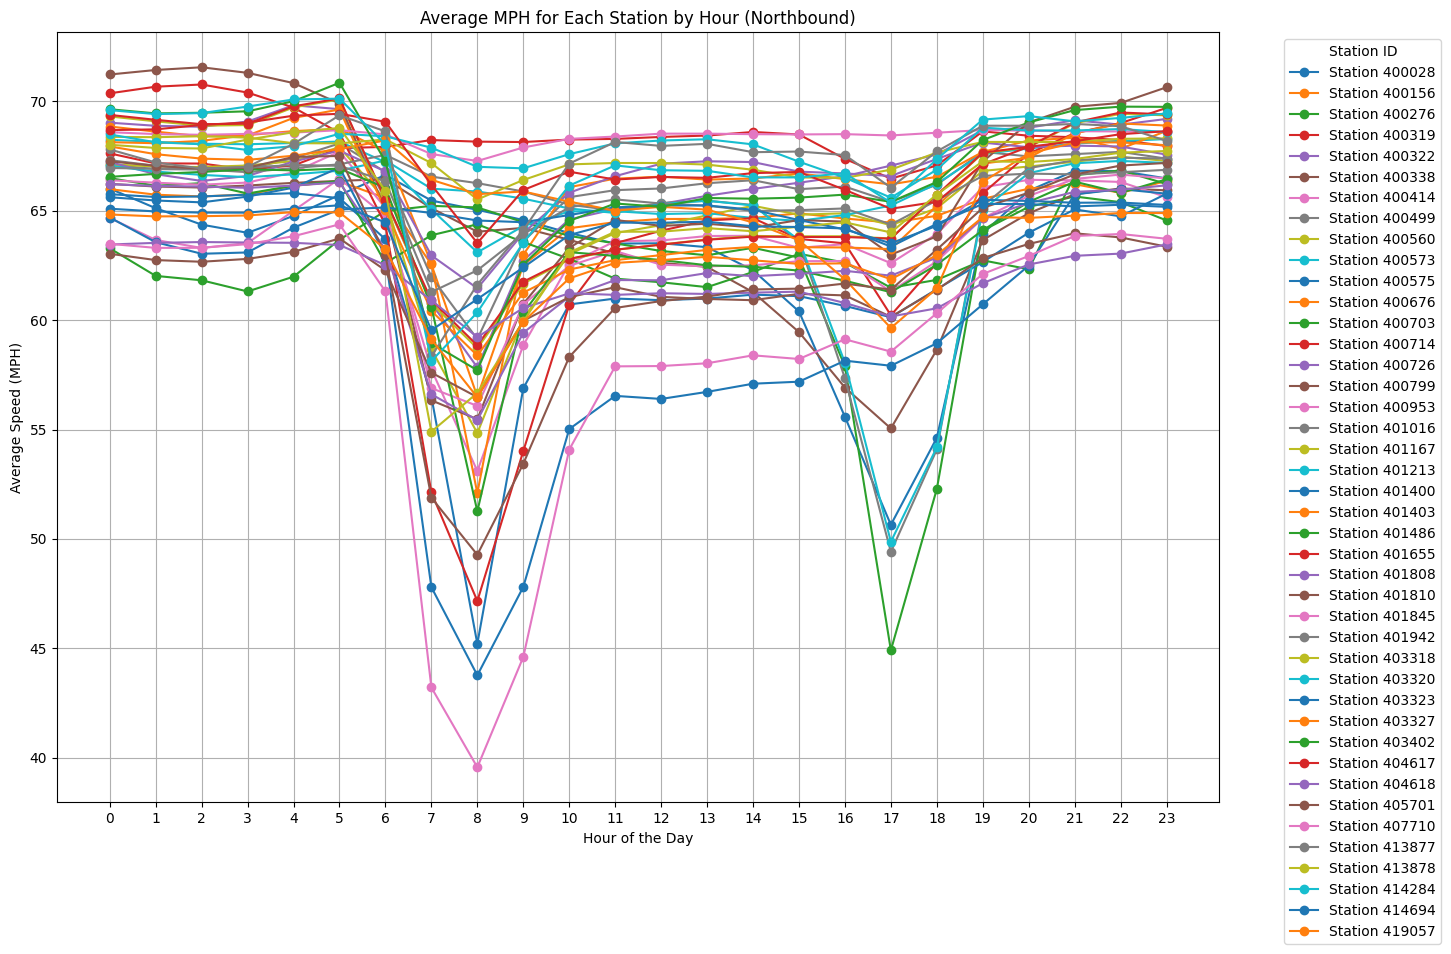

In [7]:
# Group by 'Station' and 'Hour'
avg_speed_per_station_hour = df_north.groupby(['Station', 'Hour'])['Avg Speed'].mean().reset_index()

pivot_table = avg_speed_per_station_hour.pivot(index='Station', columns='Hour', values='Avg Speed')

# Plotting all together
plt.figure(figsize=(15, 10))
for station in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[station], marker='o', label=f'Station {station}')

plt.title('Average MPH for Each Station by Hour (Northbound)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (MPH)')
plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

### Average MPH for each Station by Hour (subplot for each station)

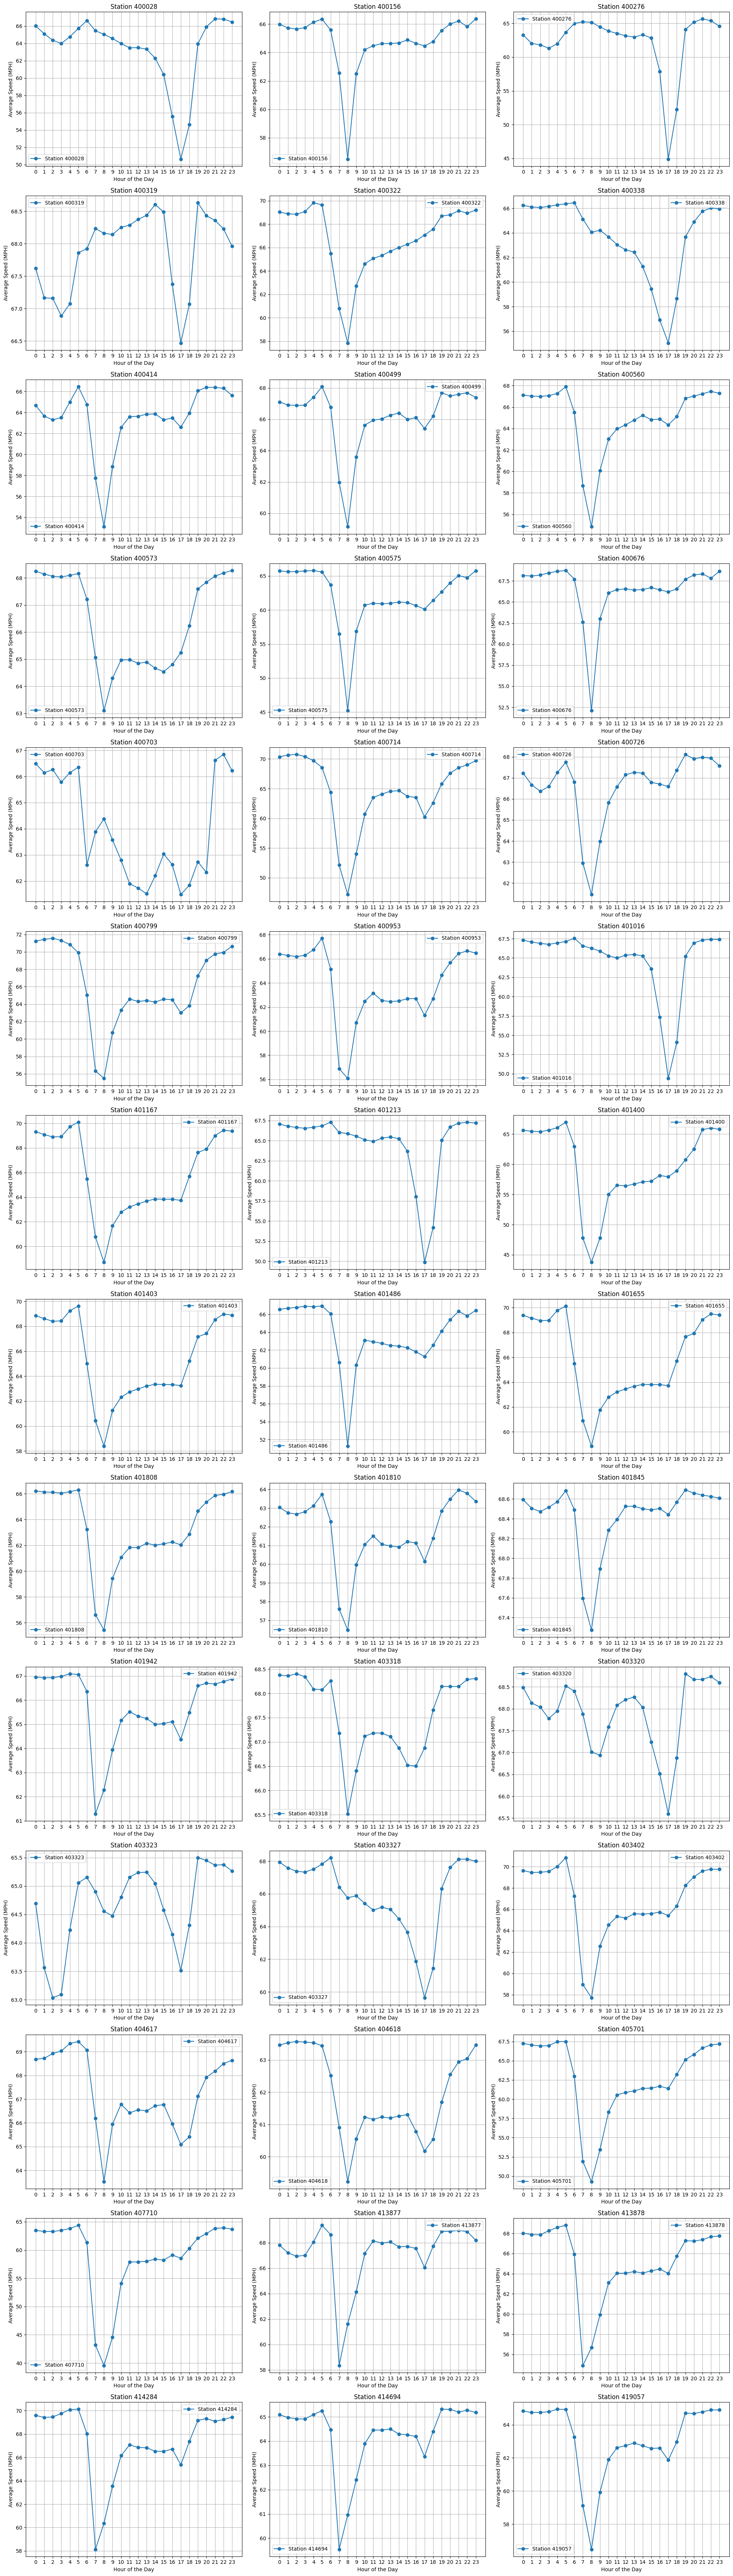

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Station' and 'Hour'
avg_speed_per_station_hour = df_north.groupby(['Station', 'Hour'])['Avg Speed'].mean().reset_index()

pivot_table = avg_speed_per_station_hour.pivot(index='Station', columns='Hour', values='Avg Speed')

# Create a subplot for each station
num_stations = len(pivot_table.index)
cols = 3
rows = np.ceil(num_stations / cols).astype(int)

# Loop over aggregate values by station
plt.figure(figsize=(20, rows * 5))
for i, station in enumerate(pivot_table.index, start=1):
    ax = plt.subplot(rows, cols, i)
    ax.plot(pivot_table.columns, pivot_table.loc[station], marker='o', label=f'Station {station}')
    ax.set_title(f'Station {station}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Speed (MPH)')
    ax.set_xticks(range(0, 24))
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

### Boxplots of Avg MPH by Station (subplots for each station)

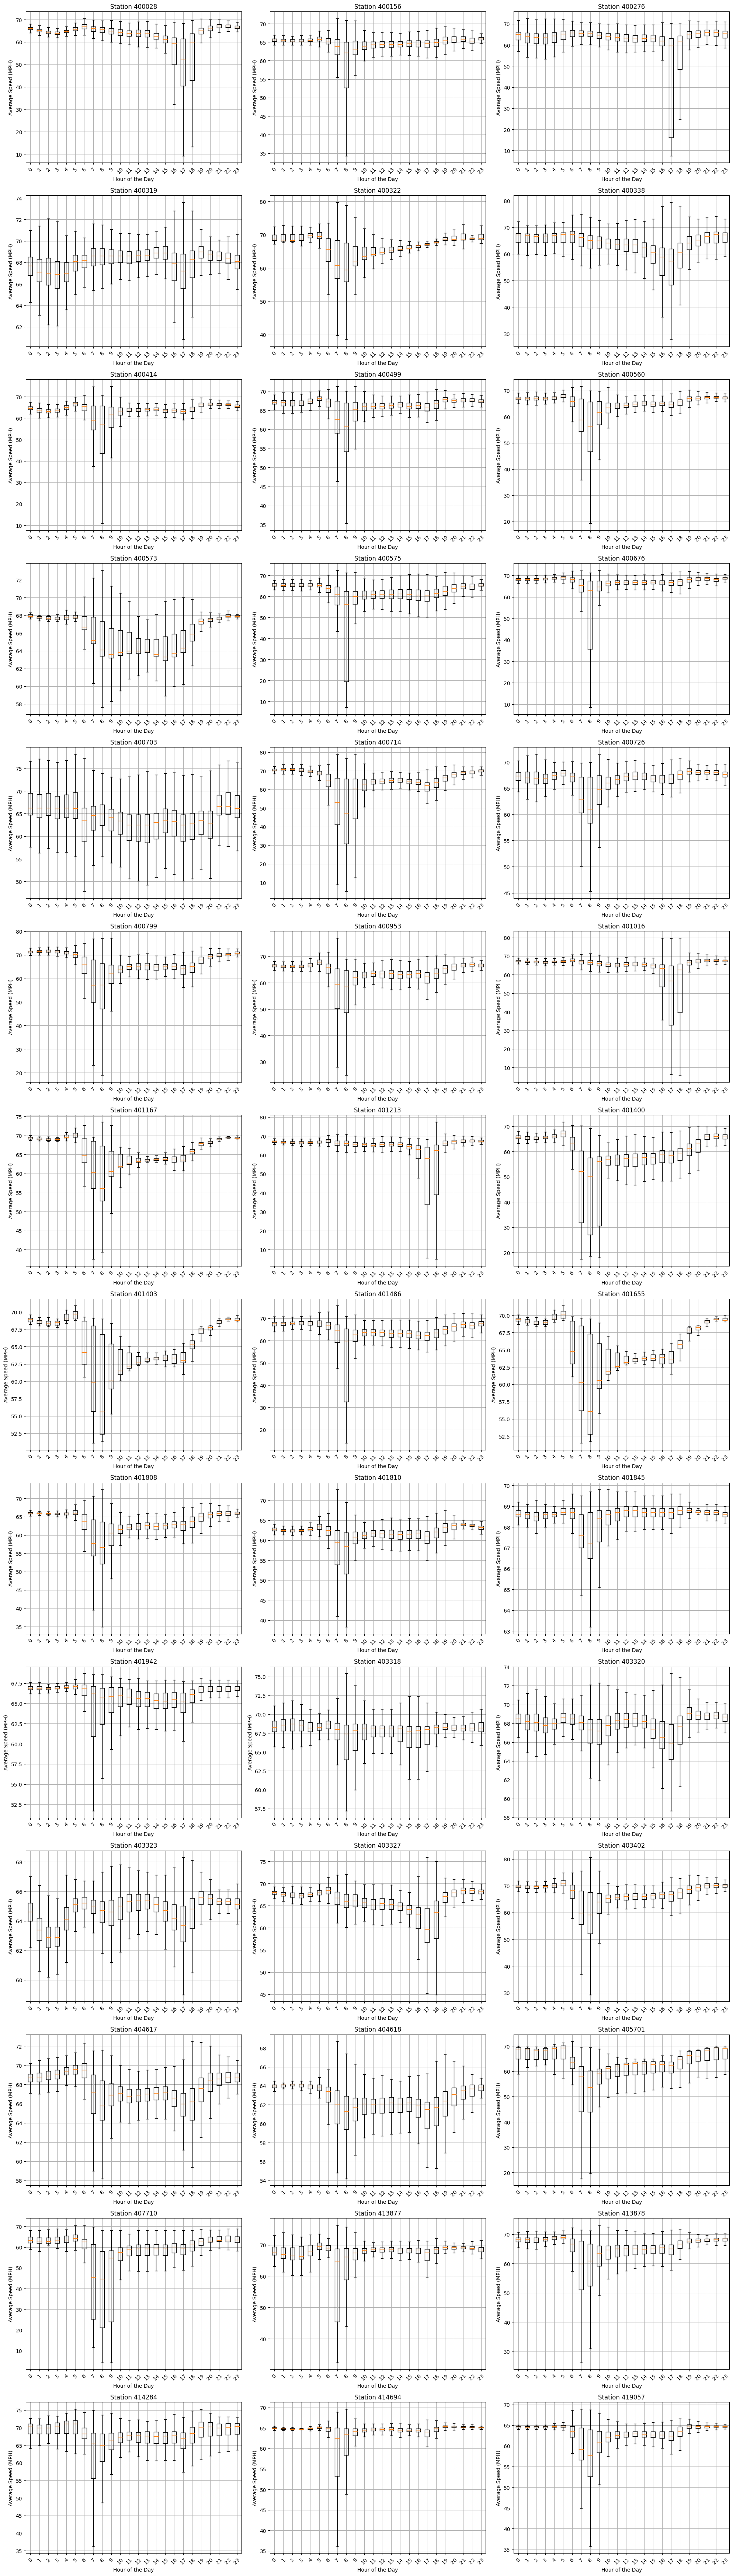

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by 'Station' and 'Hour'
avg_speed_per_station_hour = df_north.groupby(['Station', 'Hour'])['Avg Speed'].apply(list).reset_index()

# Initialize a dictionary to hold hourly speed data for each station
station_hourly_speeds = {station: [[] for _ in range(24)] for station in avg_speed_per_station_hour['Station'].unique()}

# Populate the dict
for index, row in avg_speed_per_station_hour.iterrows():
    station, hour = row['Station'], row['Hour']
    station_hourly_speeds[station][hour] = row['Avg Speed']

# Subplots for each station
num_stations = len(station_hourly_speeds.keys())
cols = 3
rows = np.ceil(num_stations / cols).astype(int)

plt.figure(figsize=(20, rows * 5))
for i, (station, speeds) in enumerate(station_hourly_speeds.items(), start=1):
    ax = plt.subplot(rows, cols, i)
    ax.boxplot(speeds, positions=range(24), showfliers=False)
    ax.set_title(f'Station {station}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Speed (MPH)')
    ax.set_xticks(range(0, 24))
    ax.set_xticklabels(range(0, 24), rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()


### Observe Colinearity with SNS Heatmap

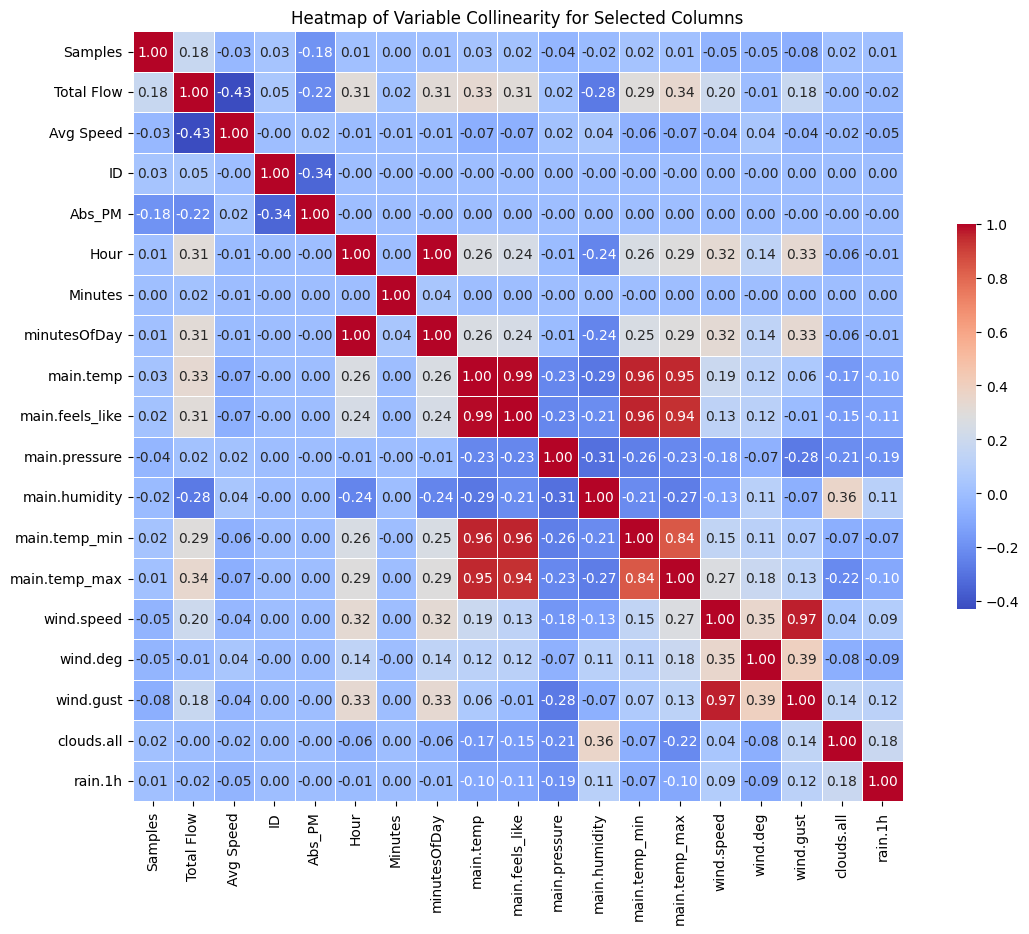

In [19]:
# Only including some columns
included_columns = ['Lane Type', 'Samples', 'Total Flow', 'Avg Speed', 'ID', 'Abs_PM',
       'Hour', 'Minutes', 'minutesOfDay', 'main.temp', 'main.feels_like',
       'main.pressure', 'main.humidity', 'main.temp_min', 'main.temp_max', 'wind.speed', 'wind.deg', 'wind.gust',
       'clouds.all', 'rain.1h']
north_for_heatmap = df_north[included_columns]

# SNS Heatmap
corr = north_for_heatmap.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Variable Collinearity for Selected Columns')
plt.show()

### Handle Null Values / Speed Manipulation

In [ ]:
df_north.isnull().sum()

In [ ]:
df_north['rain.1h'].fillna(0)                                   # Rain value is NaN when it didn't rain
df_north['rain.3h'].fillna(0)
df_north['Avg Speed'] = df_north['Avg Speed'].clip(upper=65)    # While people drive over 65mph, model shouldn't predict commute times based on speeding